# Advertising Sales Channel Prediction Project
Problem Statement:
Sales Channel Prediction Case Study

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored.

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [42]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries here.


In [44]:

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

Instead of downloading the entire dataset on my local computer I am simply loading the file directly from the GitHub repository link using the raw option.



In [45]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In the above cell we can see the first five and last five rows of our data set and as per the problem statement the column "sales" is our target label for prediction making the other columns our features. Also looking at the unnamed column one can say that it is useless in terms of contributing to any data and removing it will be better for our model.

Considering how we have continous data present in our target column this becomes a Regression problem!



## Exploratory Data Analysis (EDA)

In [47]:
df = df.drop("Unnamed: 0", axis=1)

I have dropped the unnamed column as it was not giving any insight over the sales details and was just a numbered data that was basically of no use to us since we have indexing present for our data frame.



In [49]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Checked for missing values and luckily we hav no data missing therefore we won't have to worry about handling missing data in our data set.



In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Using the info method we can see that the 3 feature column along with the target column are all of the same data type float making it easier for us to go through further data pre processing steps.



In [51]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

I see that only the newspaper column shows a huge gap between it's 75% quantile to it's maximum value while the other two feature columns show reasonable increase between each of their quantiles.



In [52]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

While checking for skewness information we see that none of our feature columns are in the acceptable range of +/-0.5 and this indicates towards the presence of outliers which might need to be handled if they are not justifiable.



### Visualization
Box Plot

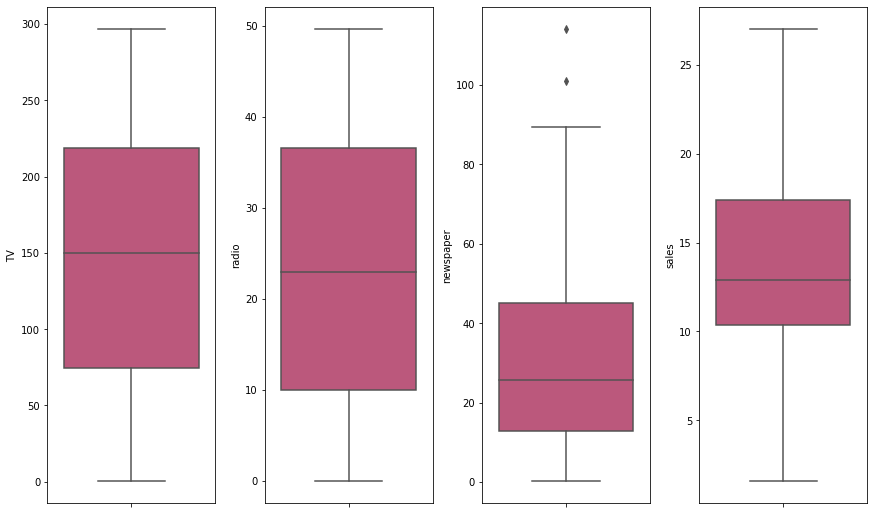

In [53]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

The above boxplot shows that only the newspaper column has 2 outliers which may be genuine or not that will need to be checked and treated if required.



#### Pair Plot


<Figure size 1080x720 with 0 Axes>

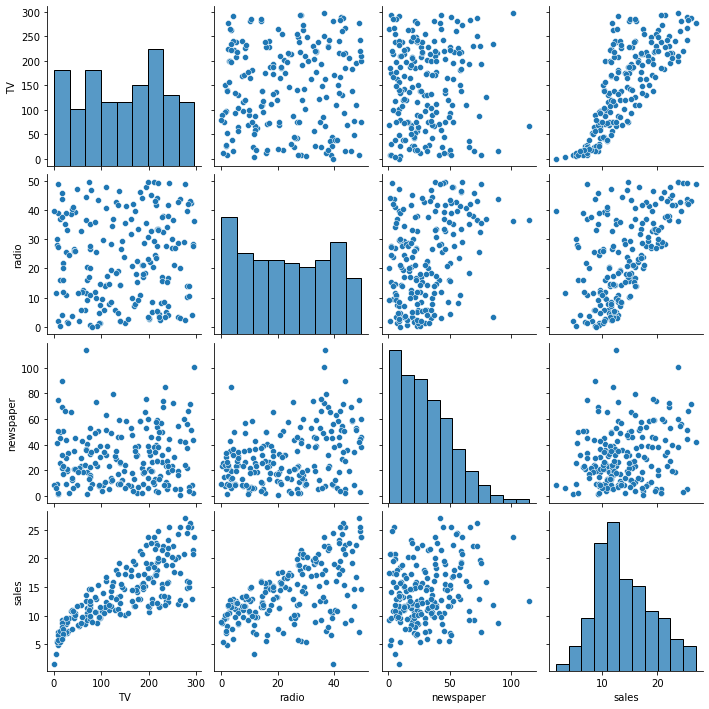

In [54]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()


With the help of above pairplot we can see that TV and Radio columns have a linear relationship with Sales. However the Newspaper column is too scattered and we can see an increase with respect to sales but their is no definite linear pattern into it.



## Distribution Plot


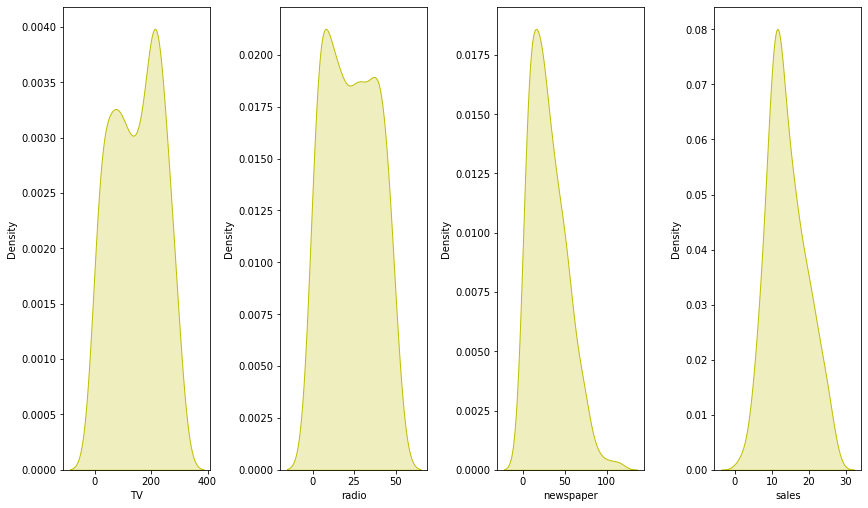

In [55]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Looking at the above distribution plot we can see that almost all the columns are maintaining the bell shape curve except for the newspaper column where we can see a visible skewness.

## Correlation using a Heatmap
Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.


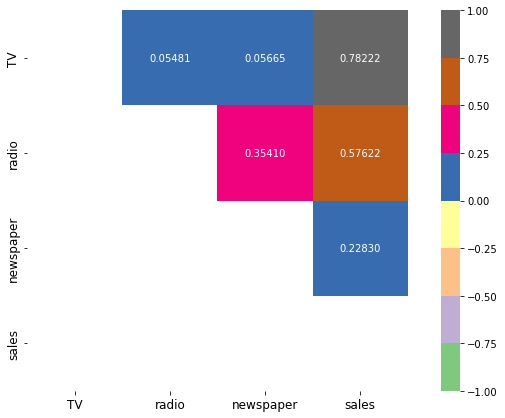

In [56]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Accent", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above heatmap we can see that there are no negative correlation present in between our features and label or between the feature columns either. Noticing the sales part we see that it has a high correlation with TV and a low correlation with Newspaper.



## Line Plots

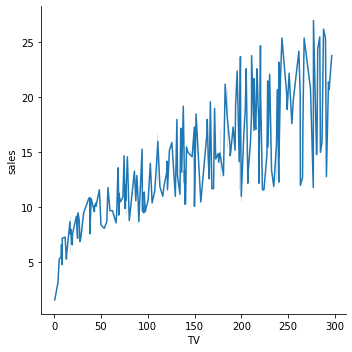

In [57]:
sns.relplot(x="TV", y="sales", kind="line", data=df)

The line plot for TV vs Sales shows a proper increasing pattern wherein the TV advertisements are playing a major role in the marketing field thus inreasing the sales.



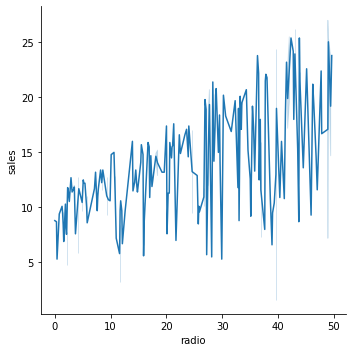

In [58]:
sns.relplot(x="radio", y="sales", kind="line", data=df)

The line plot for Radio vs Sales do not show a dominant relationship when it comes to sales like the TV option but it is definitely contributing towards the sales parameter.



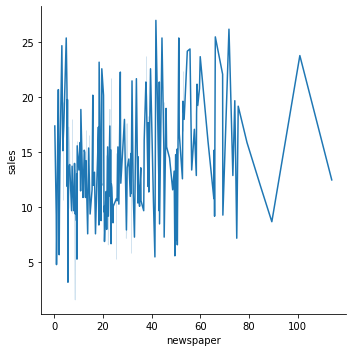

In [59]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df)

Lastly, looking at the line plot for Newspaper vs Sales we see a very random trend where in the begin the contribution is way better than towards the end showing that the outliers reflecting in our data are mere flukes where in it contributed towards the sales from that mode of marketing.



## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [60]:
X = df.drop('sales', axis=1)
Y = df['sales']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.



## Feature Scaling

In [61]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

Note: Trying to retain all the original data therefore not treating the outliers to ensure I do not have any data loss for my model creation.



## Creating the training and testing data sets

In [62]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.



In [63]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.6611334844530619
R2 Score is: 92.20737408493858
Cross Validation Score: 88.71063495438435
R2 Score - Cross Validation Score is 3.496739130554232


In [64]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 3.6048001995986403
R2 Score is: 63.30244246991666
Cross Validation Score: 72.20715307684598
R2 Score - Cross Validation Score is -8.90471060692932


In [65]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 3.456407094079052
R2 Score is: 66.26159565701089
Cross Validation Score: 62.652074809515156
R2 Score - Cross Validation Score is 3.6095208474957303


In [66]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 3.523431053156655
R2 Score is: 64.9404515466122
Cross Validation Score: 63.51515120210814
R2 Score - Cross Validation Score is 1.425300344504052


In [67]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 3.457864288204409
R2 Score is: 66.23314196696688
Cross Validation Score: 63.927402447009825
R2 Score - Cross Validation Score is 2.305739519957058


In [68]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.4656412409386508
R2 Score is: 93.93361293565967
Cross Validation Score: 93.79159839482895
R2 Score - Cross Validation Score is 0.14201454083071496


In [69]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.163231503781359
R2 Score is: 96.17873572196949
Cross Validation Score: 95.86007140956852
R2 Score - Cross Validation Score is 0.31866431240096915


In [70]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.5046477306282442
R2 Score is: 93.60641516612202
Cross Validation Score: 93.45126035084158
R2 Score - Cross Validation Score is 0.15515481528044006


## Hyper parameter tuning


In [71]:
# Choosing Ada Boost Regressor

fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

After comparing all the regression models I have selected Ada Boost Regressor as my best model and have listed down it's parameters above referring the sklearn webpage



In [72]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.



In [73]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes



In [74]:
GSCV.best_params_

{'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 150,
 'random_state': 111}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model



In [75]:
Final_Model = AdaBoostRegressor(learning_rate=1, loss="linear", n_estimators=150, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 96.18348660788863


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it



## Saving the best model


In [76]:
filename = "FinalModel_6.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_6.pkl']

#### Finally, I am saving my best regression model using the joblib library.